# Model Training to predict if a product is New or Used

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)

### Carga del dataset limpio

In [10]:
df = pd.read_csv("clean_dataset.csv")
df.head(10)

,base_price,available_quantity,sold_quantity,seller_id,days_since_start,has_warranty,condition,status_active,status_closed,status_not_yet_active,status_paused
0,80.0,1,0,74952096,3534,0,1,True,False,False,False
1,2650.0,1,0,42093335,3513,1,0,True,False,False,False
2,60.0,1,0,133384258,3529,0,0,True,False,False,False
3,580.0,1,0,143001605,3511,0,1,True,False,False,False
4,30.0,1,0,96873449,3545,1,0,True,False,False,False
5,310.0,1,0,93122911,3540,1,1,True,False,False,False
6,180.0,1,0,82247584,3502,0,0,True,False,False,False
7,150.0,1,0,40903230,3495,0,0,True,False,False,False
8,2352.0,10,0,166958416,3508,1,1,False,False,False,True
9,120.0,1,1,20834268,3505,0,1,True,False,False,False


#### Definir features y target

In [11]:
X = df.drop(columns='condition')
y = df['condition']

#### Codificar la variable objetivo

In [12]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#### Dividir el dataset de entrenamiento y test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#### Escalar las variables numéricas

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Entrenar los modelos y comparar los porcentajes

In [26]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    y_pred_proba = model.predict_proba(X_test)

    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
    }

    results.append(metrics)

c:\Users\Danie\OneDrive\Escritorio\training_model_exercise\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Danie\OneDrive\Escritorio\training_model_exercise\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Danie\OneDrive\Escritorio\training_model_exercise\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:43:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Resultados de las métricas de los modelos

                     Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression   0.67680   0.715824  0.661365  0.687518
Random Forest         0.81050   0.849077  0.787481  0.817120
XGBoost               0.81945   0.877312  0.772135  0.821370


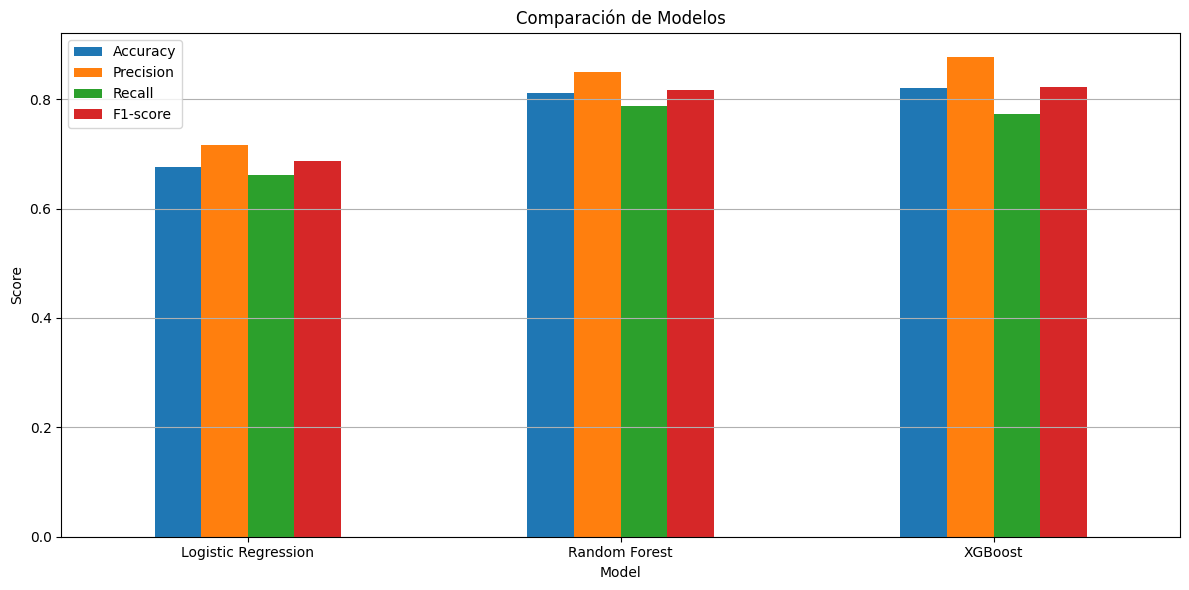

In [27]:
results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

results_df.plot(kind='bar', figsize=(12, 6), title='Comparación de Modelos')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()